# **This notebook has been created by Guntaas Kapoor**
# **For more details contact me at kapoorguntaas2409@gmail.com**

In [1]:
# Reading in the necessary libraries

## **1.1 Importing necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
!pip install catboost
from catboost import CatBoostClassifier
import lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [3]:
# Importing the data

## **1.2 Importing the data, data imputation and EDA**

In [4]:
data = pd.read_csv('train.csv')
data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45528.0,38.993411,9.543990,23.00,31.000,39.000,47.0000,5.500000e+01
no_of_children,44754.0,0.420655,0.724097,0.00,0.000,0.000,1.0000,9.000000e+00
net_yearly_income,45528.0,200655.622249,669074.034607,27170.61,126345.835,171714.910,240603.7600,1.407590e+08
no_of_days_employed,45065.0,67609.289293,139323.524434,2.00,936.000,2224.000,5817.0000,3.652520e+05
total_family_members,45445.0,2.158081,0.911572,1.00,2.000,2.000,3.0000,1.000000e+01
migrant_worker,45441.0,0.179111,0.383450,0.00,0.000,0.000,0.0000,1.000000e+00
yearly_debt_payments,45433.0,31796.965311,17269.727234,2237.47,19231.140,29081.650,40561.1500,3.281129e+05
credit_limit,45528.0,43548.416028,148784.686878,4003.14,23973.805,35688.045,53435.7625,3.112997e+07
credit_limit_used(%),45528.0,52.235020,29.376910,0.00,27.000,54.000,78.0000,9.900000e+01
credit_score,45520.0,782.791257,100.619746,500.00,704.000,786.000,867.0000,9.490000e+02


In [7]:
# Total rows: 45528

In [8]:
# Checking for missing values and imputing them

In [9]:
data.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,547
owns_house,0
no_of_children,774
net_yearly_income,0
no_of_days_employed,463
occupation_type,0


In [10]:
# Owns car - Y, N
# no_of_children - integer
# no_of_days_employed - float
# total_family_members - float
# migrant_worker - float
# yearly_debt_payments - float
# credit_score - float

In [11]:
data['owns_car'].unique()

array(['N', 'Y', nan], dtype=object)

In [12]:
data['no_of_children'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

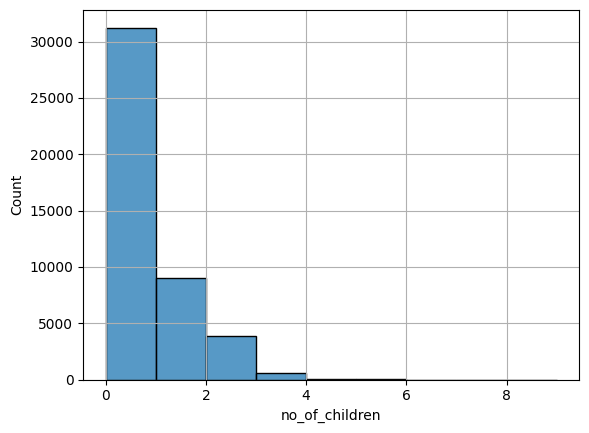

In [13]:
sns.histplot(data = data, x = data['no_of_children'], binwidth = 1)
plt.grid()
# 'no_of_children is highly skewed so using median as imputation method'

In [14]:
no_of_children_median = np.nanmedian(data['no_of_children'])
no_of_children_median
data['no_of_children'] = data['no_of_children'].fillna(no_of_children_median)
# nanmedian computes the median of the data while ignoring the nan values

<Axes: xlabel='owns_car', ylabel='Count'>

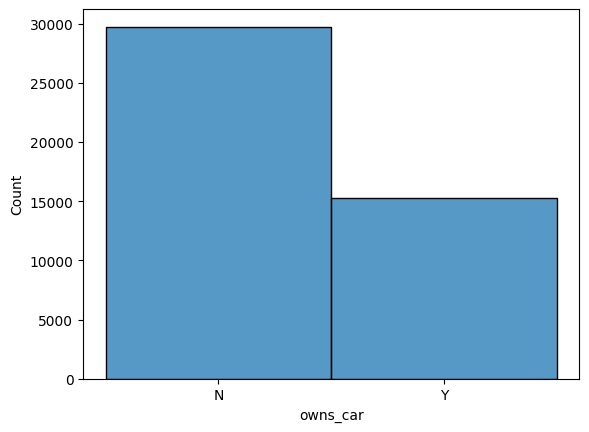

In [15]:
sns.histplot(data = data, x = data['owns_car'], binwidth = 1)
# using mode as the inputation method by observing the most common occuring value, difference between counts is

In [16]:
data['owns_car'].value_counts()
len(data['owns_car'])
y_prop = ((data['owns_car'] == 'Y').sum()/len(data['owns_car']))*100
n_prop = ((data['owns_car'] == 'N').sum()/len(data['owns_car']))*100
print(n_prop, y_prop)
# owns_car == N has almost double the proportion of owns_car == Y

65.32902829028289 33.469513266561236


In [17]:
owns_car_mode = data['owns_car'].mode()[0]
data['owns_car'] = data['owns_car'].fillna(owns_car_mode)

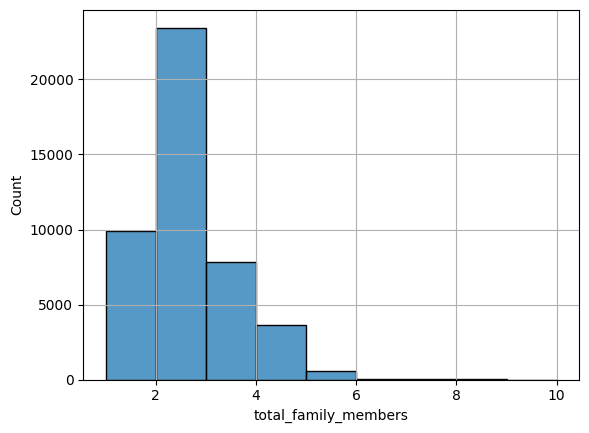

In [18]:
sns.histplot(data = data, x = data['total_family_members'], binwidth = 1)
plt.grid()

In [19]:
# need to check the relationship between the no_of_children and total_family_members before any data imputation

<Axes: xlabel='no_of_children', ylabel='total_family_members'>

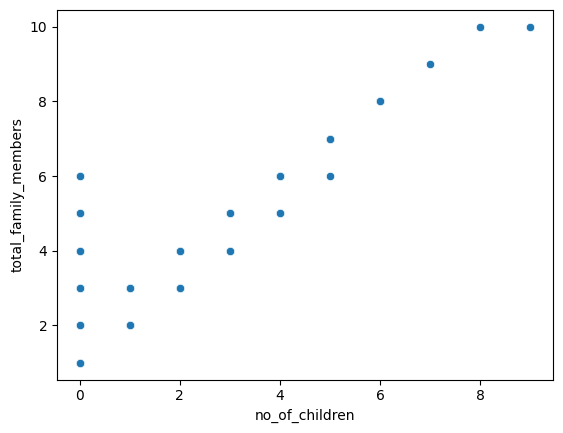

In [20]:
sns.scatterplot(data = data, x = data['no_of_children'], y = data['total_family_members'])

In [21]:
total_family_members_median = np.nanmedian(data['total_family_members'])
total_family_members_median
data['total_family_members'] = data['total_family_members'].fillna(total_family_members_median)

<Axes: xlabel='no_of_children', ylabel='Density'>

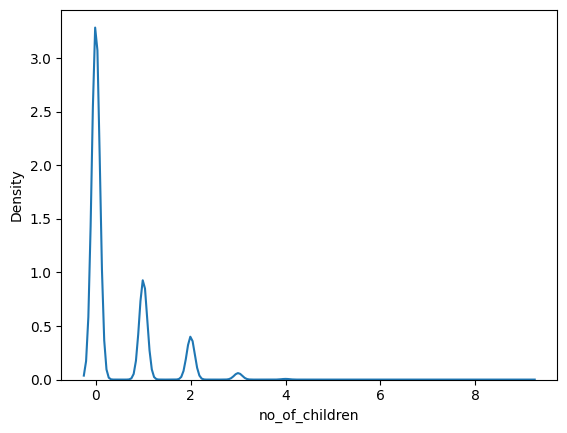

In [22]:
sns.kdeplot(data['no_of_children'])

In [23]:
data.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,463
occupation_type,0


In [24]:
data['migrant_worker'].value_counts()

,count
migrant_worker,
0.0,37302
1.0,8139


In [25]:
# Represents whether a customer is a migrant worker. 1 means yes and 0 means no

In [26]:
data['migrant_worker'].isnull().sum()

np.int64(87)

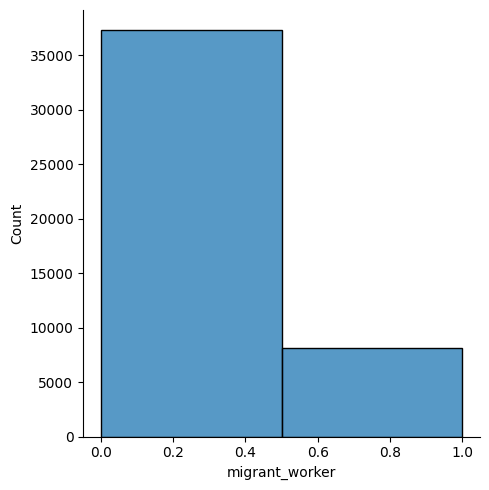

In [27]:
sns.displot(data = data, x = data['migrant_worker'], binwidth = 0.5)

In [28]:
# using mode as the imputation method since migrant_worker = 0 is nearly 4 times the number of migrant_worker = 0

In [29]:
migrant_worker_mode = data['migrant_worker'].mode()[0]
migrant_worker_mode
data['migrant_worker'] = data['migrant_worker'].fillna(migrant_worker_mode)

In [30]:
data.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,463
occupation_type,0


In [31]:
data['no_of_days_employed'].value_counts()

,count
no_of_days_employed,
365246.0,684
365244.0,669
365240.0,641
365245.0,631
365241.0,628
...,...
7702.0,1
5478.0,1
4845.0,1


<Axes: >

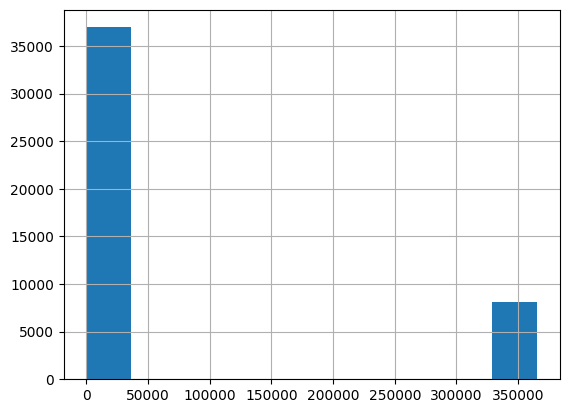

In [32]:
data['no_of_days_employed'].hist()

In [33]:
# using median as data imputation method
no_of_days_employed_median = np.nanmedian(data['no_of_days_employed'])
data['no_of_days_employed'] = data['no_of_days_employed'].fillna(no_of_days_employed_median)

In [34]:
yearly_debt_payments_median = np.nanmedian(data['yearly_debt_payments'])
yearly_debt_payments_median
data['yearly_debt_payments'] = data['yearly_debt_payments'].fillna(yearly_debt_payments_median)

In [35]:
credit_score_median = np.nanmedian(data['credit_score'])
credit_score_median
data['credit_score'] = data['credit_score'].fillna(credit_score_median)

In [36]:
data.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
occupation_type,0


In [37]:
# EDA

In [38]:
# Encoding variables

In [39]:
data = data.drop(['name'], axis = 1)

In [40]:
data

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


## **1.3 Encoding the Data**

In [41]:
le = LabelEncoder()

data.gender = le.fit_transform(data.gender)
data.owns_car = le.fit_transform(data.owns_car)
data.owns_house = le.fit_transform(data.owns_house)
data.occupation_type = le.fit_transform(data.occupation_type)
data.migrant_worker = le.fit_transform(data.migrant_worker)
data.credit_card_default = le.fit_transform(data.credit_card_default)

In [42]:
data

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,0,0,1,0.0,107934.04,612.0,17,1.0,1,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,1,0,1,0.0,109862.62,2771.0,8,2.0,0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,1,0,1,0.0,230153.17,204.0,8,2.0,0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,0,0,1,0.0,122325.82,11941.0,3,2.0,0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,1,1,1,0.0,387286.00,1459.0,3,1.0,0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,55,0,0,0,2.0,96207.57,117.0,17,4.0,0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,31,0,0,1,0.0,383476.74,966.0,0,2.0,1,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,27,0,0,1,0.0,260052.18,1420.0,3,2.0,0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,32,1,1,0,0.0,157363.04,2457.0,8,2.0,0,20150.10,25538.72,92,805.0,0,0,0


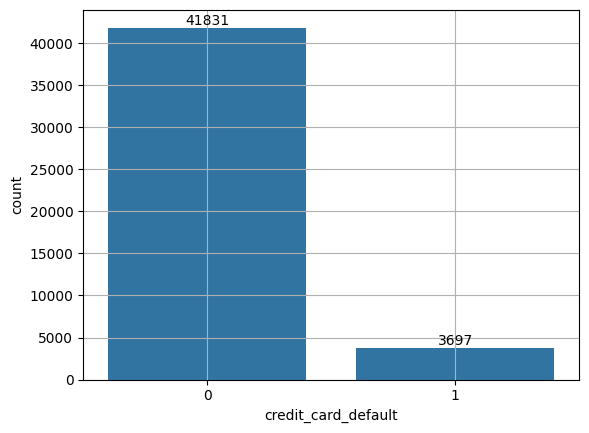

In [43]:
ax = sns.countplot(data = data, x = data['credit_card_default'])
ax.bar_label(ax.containers[0])
plt.grid()

In [44]:
# The number of people who defaulted on their Credit Card payments is very less and this represents a class imbalance

In [45]:
customer_id = data['customer_id']

In [46]:
customer_id

,customer_id
0,CST_115179
1,CST_121920
2,CST_109330
3,CST_128288
4,CST_151355
...,...
45523,CST_130421
45524,CST_136670
45525,CST_145435
45526,CST_130913


In [47]:
data = data.drop(['customer_id'], axis = 1)

In [48]:
data

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0,0,1,0.0,107934.04,612.0,17,1.0,1,33070.28,18690.93,73,544.0,2,1,1
1,29,1,0,1,0.0,109862.62,2771.0,8,2.0,0,15329.53,37745.19,52,857.0,0,0,0
2,37,1,0,1,0.0,230153.17,204.0,8,2.0,0,48416.60,41598.36,43,650.0,0,0,0
3,39,0,0,1,0.0,122325.82,11941.0,3,2.0,0,22574.36,32627.76,20,754.0,0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,3,1.0,0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,0,0,0,2.0,96207.57,117.0,17,4.0,0,11229.54,29663.83,82,907.0,0,0,0
45524,31,0,0,1,0.0,383476.74,966.0,0,2.0,1,43369.91,139947.16,32,679.0,0,0,0
45525,27,0,0,1,0.0,260052.18,1420.0,3,2.0,0,22707.51,83961.83,46,727.0,0,0,0
45526,32,1,1,0,0.0,157363.04,2457.0,8,2.0,0,20150.10,25538.72,92,805.0,0,0,0


In [49]:
y = data['credit_card_default']
X = data.drop('credit_card_default', axis = 1)

## **1.4.1 Train Test Split**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, stratify = y, random_state = 24)

## **1.4.2 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(random_state = 24, n_estimators = 500)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=24)

In [ ]:
y_predict_rf = model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
rf_f1_score = f1_score(y_test, y_predict_rf)
rf_f1_score

0.8626247122026094

In [ ]:
from sklearn.metrics import recall_score
rf_recall_score = recall_score(y_test, y_predict_rf)
rf_recall_score

0.7604871447902571

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_predict_rf)
conf_matrix_rf
from sklearn.metrics import ConfusionMatrixDisplay
display_rf = ConfusionMatrixDisplay(conf_matrix, display_labels = ['0', '1'])

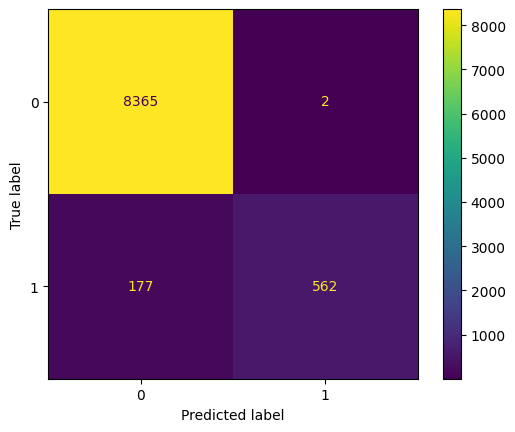

In [ ]:
display_rf.plot()

## **1.4.3 XGBOOST (Base Model)**

In [108]:
xgb = XGBClassifier(scale_pos_weight = (y_train == 0).sum()/(y_train == 1).sum(),
                    tree_method='gpu_hist',
                    predictor='gpu_predictor',
                    use_label_encoder = False,
                    eval_metric = 'logloss',
                    learning_rate = 0.1,
                    random_state = 24)

In [109]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:39:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:39:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [110]:
y_predict_XGB = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:2676: UserWarning: [12:39:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [111]:
from sklearn.metrics import f1_score
f1_score_xgBoost_macro = f1_score(y_test, y_predict_XGB, average = 'macro')
f1_score_xgBoost_macro

0.8876761111021727

In [112]:
from sklearn.metrics import recall_score
recall_score_xgboost = recall_score(y_test, y_predict_XGB, average = 'binary', pos_label = 1)
recall_score_xgboost

0.9824086603518268

In [113]:
conf_matrix_xgb = confusion_matrix(y_test, y_predict_XGB)
conf_matrix_xgb
from sklearn.metrics import ConfusionMatrixDisplay
display_xgb = ConfusionMatrixDisplay(conf_matrix_xgb, display_labels = ['0', '1'])

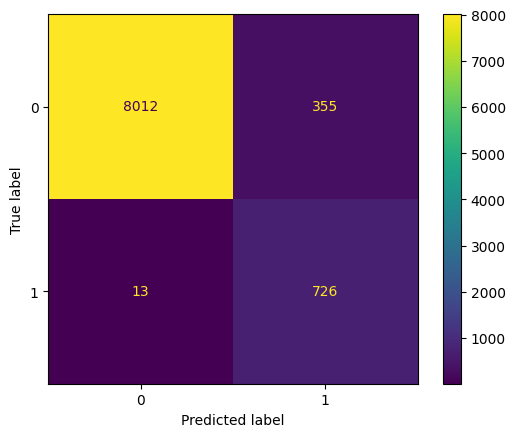

In [114]:
display_xgb.plot()

## **1.4.4 XGBOOST (Tuned)**

In [91]:
xgb_model = XGBClassifier(scale_pos_weight = (y_train == 0).sum()/(y_train == 1).sum(),
                          tree_method='gpu_hist',
                          predictor='gpu_predictor',
                          use_label_encoder = False, eval_metric = 'logloss', random_state = 24)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_lambda': [1, 10]
}


In [67]:
cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 24)
scoring_f1 = {
    'f1': make_scorer(f1_score, average = 'macro')
}

In [92]:
random_search_f1 = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = param_grid,
    n_iter = 50,
    scoring = scoring_f1,
    refit = 'f1',
    cv = cv,
    verbose = 1,
    random_state = 24,
    n_jobs = -1
)

random_search_f1.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:28:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:28:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=24, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None...
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [1, 10],
                                        'subsample': [0.8, 1.0]},
                   random_state=24, refit='f1',
                   scoring={'f1': make_scorer(f1_score, response_method='predict', average=macro)},
                   verbose=1)

In [93]:
print("Best Parameters:", random_search_f1.best_params_)
print("Best F1 Macro Score:", random_search_f1.best_score_)

Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best F1 Macro Score: 0.911749770177031


In [95]:
cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 24)
scoring_recall = {
    'recall': make_scorer(recall_score, average = 'binary', pos_label = 1)
}

In [96]:
random_search_recall = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = param_grid,
    n_iter = 50,
    scoring = scoring_recall,
    refit = 'recall',
    cv = cv,
    verbose = 1,
    random_state = 24,
    n_jobs = -1
)

random_search_recall.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:32:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:32:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=24, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [1, 10],
                                        'subsample': [0.8, 1.0]},
                   random_state=24, refit='recall',
                   scoring={'recall': make_scorer(recall_score, response_method='predict', average=binary, pos_label=1)},
                   verbose=1)

In [98]:
print("Best parameters: ", random_search_recall.best_params_)
print("Best Recall Score: ", random_search_recall.best_score_)

Best parameters:  {'subsample': 0.8, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Recall Score:  0.9996621621621622


In [102]:
random_search_recall.cv_results_['mean_test_recall'].max()

np.float64(0.9996621621621622)

## **1.4.5 CatBoost (Base Model)**

In [124]:
model_catBoost = CatBoostClassifier(class_weights = [1, (y_train == 0).sum()/(y_train == 1).sum()],
                                   verbose = 0,
                                   random_state = 24)

In [125]:
model_catBoost.fit(X_train, y_train)

In [126]:
y_predict_catBoost = model_catBoost.predict(X_test)

In [127]:
from sklearn.metrics import f1_score
f1_score_catBoost_macro = f1_score(y_test, y_predict_catBoost, average = 'macro')
f1_score_catBoost_macro

0.9045531570457761

In [128]:
from sklearn.metrics import recall_score
cat_rs = recall_score(y_test, y_predict_catBoost, average = 'binary', pos_label = 1)
cat_rs

0.9282814614343707

In [129]:
conf_matrix_catBoost = confusion_matrix(y_test, y_predict_catBoost)
conf_matrix_catBoost
from sklearn.metrics import ConfusionMatrixDisplay
display_catBoost = ConfusionMatrixDisplay(conf_matrix_catBoost, display_labels = ['0', '1'])

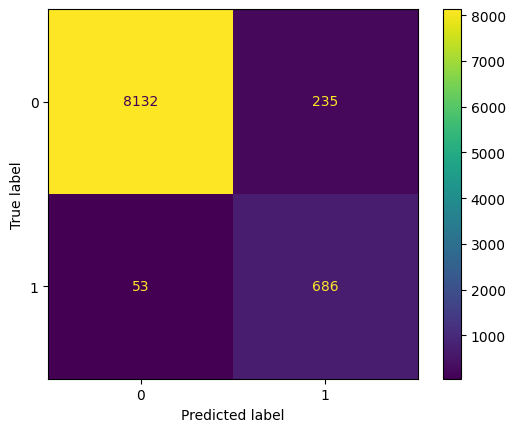

In [130]:
display_catBoost.plot()

## **1.4.6 CatBoost (Tuned)**

In [117]:
from catboost import CatBoostClassifier
cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 24)
scorer = make_scorer(f1_score, average = 'macro')

class_weights = [(y_train == 0).sum() / len(y_train), (y_train == 1).sum() / len(y_train)]

cat_model = CatBoostClassifier(
    loss_function = 'Logloss',
    class_weights = class_weights,
    verbose = 0,
    random_state = 24
)

cat_param_grid = {
    'depth': [4, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 400],
    'bagging_temperature': [0.0, 0.3, 0.6, 1.0]
}

cat_random_search = RandomizedSearchCV(
    estimator = cat_model,
    param_distributions = cat_param_grid,
    n_iter = 20,
    scoring = scorer,
    cv = cv,
    verbose = 1,
    random_state = 24,
    n_jobs = -1
)

cat_random_search.fit(X_train, y_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=24, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x78d1b54de290>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.0, 0.3, 0.6,
                                                                1.0],
                                        'depth': [4, 6, 7, 8],
                                        'iterations': [200, 400],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=24,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro),
                   verbose=1)

In [118]:
print("Best Parameters:", cat_random_search.best_params_)
print("Best F1 Macro Score:", cat_random_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'iterations': 200, 'depth': 7, 'bagging_temperature': 0.3}
Best F1 Macro Score: 0.9265315924056843


## **1.4.7 Light GBM (Base Model)**

In [132]:
model_lightgbm = lightgbm.LGBMClassifier(class_weight = 'balanced', random_state = 24)

In [133]:
model_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2958, number of negative: 33464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1445
[LightGBM] [Info] Number of data points in the train set: 36422, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', random_state=24)

In [134]:
y_predict_lightgbm = model_lightgbm.predict(X_test)

In [135]:
from sklearn.metrics import f1_score
f1_score_lightgbm = f1_score(y_test, y_predict_lightgbm, average = 'macro')
f1_score_lightgbm

0.9039163134721822

In [136]:
from sklearn.metrics import recall_score
recall_lightgbm = recall_score(y_test, y_predict_lightgbm, average = 'macro', pos_label = 1)
recall_lightgbm

0.9559072281676209

In [ ]:
conf_matrix_lightgbm = confusion_matrix(y_test, y_predict_lightgbm)
conf_matrix_lightgbm
from sklearn.metrics import ConfusionMatrixDisplay
display_lightgbm = ConfusionMatrixDisplay(conf_matrix_lightgbm, display_labels = ['0', '1'])

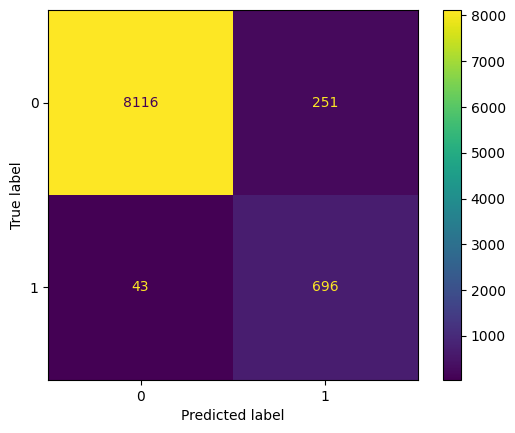

In [ ]:
display_lightgbm.plot()

## **1.4.8 Light GBM (Tuned)**

In [ ]:
cv = StratifiedKFold(n_splits = 4, shuffle=True, random_state = 24)
scorer = make_scorer(f1_score, average = 'macro')


scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

lightgbm_model = lightgbm.LGBMClassifier(objective = 'binary', scale_pos_weight = scale_pos_weight, random_state = 24)

lightgbm_param_grid = {
    'num_leaves': np.arange(20, 100, 20),
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(3, 10),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

lightgbm_random_search = RandomizedSearchCV(
    estimator = lightgbm_model,
    param_distributions = lightgbm_param_grid,
    n_iter = 50,
    scoring = scorer,
    cv = cv,
    verbose = 1,
    random_state = 42,
    n_jobs = -1
)

lightgbm_random_search.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
[LightGBM] [Info] Number of positive: 2958, number of negative: 33464
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1445
[LightGBM] [Info] Number of data points in the train set: 36422, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081215 -> initscore=-2.425957
[LightGBM] [Info] Start training from score -2.425957


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=24, shuffle=True),
                   estimator=LGBMClassifier(objective='binary', random_state=24,
                                            scale_pos_weight=np.float64(11.313049357674105)),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400]),
                                        'num_leaves': array([20, 40, 60, 80]),
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro),
                   verbose=1)

In [ ]:
print("Best Parameters:", lightgbm_random_search.best_params_)
print("Best F1 Macro Score:", lightgbm_random_search.best_score_)

Best Parameters: {'subsample': 1.0, 'num_leaves': np.int64(40), 'n_estimators': np.int64(300), 'max_depth': np.int64(9), 'learning_rate': np.float64(0.09000000000000001), 'colsample_bytree': 0.8}
Best F1 Macro Score: 0.9110814765698183


## **2. Results**

In [138]:
# xgb:
# 1. f1 macro from 88.77 to 91.17
# 2. Baseline recall: 98.24 to 99.96

# Random Forest
# 1. f1 macro 86.2624
# 2. Baseline recall: 76.048

# lightgbm
# 1. f1 macro from 90.39 to 91.11
# 2. Baseline recall: 95.60

# catboost
# 1. f1 macro from 90.46 to 92.65
# Baseline Recall: 92.83

# **Thank You**
# **This notebook has been created by Guntaas Kapoor**
# **For more details contact me at kapoorguntaas2409@gmail.com**